In [1]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import development
import matplotlib.pyplot as plt
import visualize
from main import load_data
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage.feature import plot_matches
from helpers import cheat_interest_points, evaluate_correspondence

In [3]:
image1, image2, eval_file = load_data("notre_dame")
image1 = rgb2gray(image1) * 255
image2 = rgb2gray(image2) * 255
scale_factor = .25
image1 = np.float32(rescale(image1, scale_factor, multichannel=False))
image2 = np.float32(rescale(image2, scale_factor, multichannel=False))
feature_width = 16
(x1, y1, x2, y2) = cheat_interest_points(eval_file, scale_factor)

(149, 1) (149, 1)


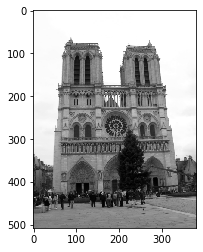

In [4]:
plt.imshow(image2, cmap="gray")
print(x1.shape, x2.shape)

In [5]:
image1_features = development.get_features(image1, x1, y1, feature_width)
image2_features = development.get_features(image2, x2, y2, feature_width)

/Users/sebastianbertoli/GitHub Projects/csci1430/project02_local_feature_matching/code/development.py:122: RuntimeWarning: invalid value encountered in true_divide
  bin_vector = bin_vector / np.sum(bin_vector)


In [6]:
image1_features

array([[0.        , 0.9699276 , 0.        , ..., 0.97960052, 0.        ,
        0.        ],
       [0.        , 0.36883003, 0.        , ..., 0.12803457, 0.        ,
        0.        ],
       [0.        , 0.85023547, 0.        , ..., 0.55939584, 0.        ,
        0.        ],
       ...,
       [0.        , 0.21423632, 0.        , ..., 0.29903147, 0.        ,
        0.        ],
       [0.        , 0.52661648, 0.        , ..., 0.99984924, 0.        ,
        0.        ],
       [0.        , 0.49991377, 0.        , ..., 0.79058688, 0.        ,
        0.        ]])

In [7]:
matches, confidences = development.match_features(image1_features, image2_features)

124.0 total good matches, 25 total bad matches.
83.22147651006712% precision
85% accuracy (top 100)
Vizualizing...


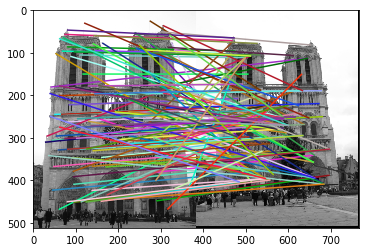

85

In [8]:
num_pts_to_evaluate = matches.shape[0]
evaluate_correspondence(image1, image2, eval_file, scale_factor,
                            x1, y1, x2, y2, matches, confidences, num_pts_to_evaluate)

Matches: 12


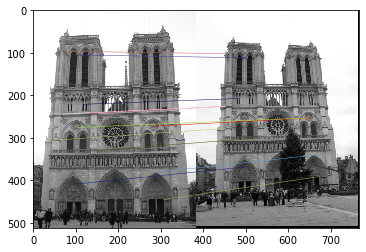

In [9]:
mask = confidences > 0.3

plt.rcParams["lines.linewidth"] = 0.5
num_pts_to_visualize = matches[mask].shape[0]
print("Matches: " + str(num_pts_to_visualize))
visualize.show_correspondences(image1, image2, x1, y1, x2, y2, matches[mask],
                               mode="points",
                               filename="e_gaudi" + "_matches.jpg")